# Multivariate analysis

# Datasets

- > **MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km** 

- > **ERA5 Monthly aggregates - Latest climate reanalysis produced by ECMWF / Copernicus Climate Change Service** 

- > **MOD14A1.006: Terra Thermal Anomalies & Fire Daily Global 1km**

# Variables of interest

- > **`EVI`**

- > **`NDVI`**

- > **`Minimum Temperature`**

- > **`Maximum Temperature`**

- > **`Fire`**

# Preprocessing

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
os.listdir()

['.ipynb_checkpoints',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Bangalore shapefiles.csv',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Chennai shapefiles.csv',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_cities shapefiles.txt',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Cities.mp4',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Delhi Shape Files.csv',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Mumbai shapefiles.csv',
 'bangalore.shp',
 'BBMP-polygon.dbf',
 'BBMP-polygon.prj',
 'BBMP-polygon.shp',
 'BBMP-polygon.shx',
 'BMC_Wards-polygon.dbf',
 'BMC_Wards-polygon.prj',
 'BMC_Wards-polygon.shp',
 'BMC_Wards-polygon.shx',
 'chennai.shp',
 'delhi.shp',
 'Delhi_Wards-polygon.dbf',
 'Delhi_Wards-polygon.prj',
 'Delhi_Wards-polygon.shp',
 'Delhi_Wards-polygon.shx',
 'EE Multi Variate.ipynb',
 'EE preprocessing.ipynb',
 'ERA_T_80-.csv',
 'Fire_M_11.csv',
 'mumbai.shp',
 'Wards-polygon.dbf',
 'War

In [2]:
df_bang = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Bangalore shapefiles.csv")
df_chennai = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Chennai shapefiles.csv")
df_delhi = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Delhi Shape Files.csv")
df_mumbai = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Mumbai shapefiles.csv")

In [3]:
df_bang = df_bang.drop(columns=['ASS_CONST1','WARD_NO'])
df_chennai = df_chennai.drop(columns=['Zone_No'])
df_delhi = df_delhi.drop(columns=['Ward_No'])
df_mumbai = df_mumbai.drop(columns=['name'])

In [4]:
df_bang['date']=df_bang['date'].str.split('T').apply(lambda x:x[0])
df_bang['date']=pd.to_datetime(df_bang['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
bang = pd.DataFrame({'ward_name':df_bang['WARD_NAME'],'date':df_bang['date'],'year':df_bang['date'].apply(lambda x:x.year),
                     'month':df_bang['date'].apply(lambda x:x.month),'EVI':df_bang['EVI'],'NDVI':df_bang['NDVI']})

df_chennai['date']=df_chennai['date'].str.split('T').apply(lambda x:x[0])
df_chennai['date']=pd.to_datetime(df_chennai['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
df_chennai['Ward_No']=df_chennai['Ward_No'].astype(str)
chennai = pd.DataFrame({'ward_name':df_chennai['Zone_Name']+'_'+df_chennai['Ward_No'],'date':df_chennai['date'],
                        'year':df_chennai['date'].apply(lambda x:x.year),'month':df_chennai['date'].apply(lambda x:x.month),
                        'EVI':df_chennai['EVI'],'NDVI':df_chennai['NDVI']})

df_delhi['date']=df_delhi['date'].str.split('T').apply(lambda x:x[0])
df_delhi['date']=pd.to_datetime(df_delhi['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
delhi = pd.DataFrame({'ward_name':df_delhi['Ward_Name'],'date':df_delhi['date'],'year':df_delhi['date'].apply(lambda x:x.year),
                      'month':df_delhi['date'].apply(lambda x:x.month),'EVI':df_delhi['EVI'],'NDVI':df_delhi['NDVI']})

df_mumbai['date']=df_mumbai['date'].str.split('T').apply(lambda x:x[0])
df_mumbai['date']=pd.to_datetime(df_mumbai['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
mumbai = pd.DataFrame({'gid':df_mumbai['gid'],'date':df_mumbai['date'],'year':df_mumbai['date'].apply(lambda x:x.year),
                       'month':df_mumbai['date'].apply(lambda x:x.month),'EVI':df_mumbai['EVI'],'NDVI':df_mumbai['NDVI']})

In [5]:
bang_mean = bang.groupby('date').mean()
bang_mean = bang_mean.reset_index()
bang_mean.head()

,date,year,month,EVI,NDVI
0,2000-02-01,2000,2,1841.286259,3170.631568
1,2000-03-01,2000,3,1987.458657,3133.192418
2,2000-04-01,2000,4,2032.155539,3264.212161
3,2000-05-01,2000,5,2424.859653,3465.048153
4,2000-06-01,2000,6,2663.616580,3813.603514


In [6]:
chennai_mean = chennai.groupby('date').mean()
chennai_mean = chennai_mean.reset_index()
chennai_mean.head()

,date,year,month,EVI,NDVI
0,2000-02-01,2000,2,1858.559052,3500.296371
1,2000-03-01,2000,3,2055.670225,3760.114231
2,2000-04-01,2000,4,2077.069303,3386.562028
3,2000-05-01,2000,5,1977.091646,3232.544412
4,2000-06-01,2000,6,2175.335210,3590.846720


In [7]:
delhi_mean = delhi.groupby('date').mean()
delhi_mean = delhi_mean.reset_index()
delhi_mean.head()

,date,year,month,EVI,NDVI
0,2000-02-01,2000,2,1338.129079,2304.837026
1,2000-03-01,2000,3,1440.229663,2408.900200
2,2000-04-01,2000,4,1326.585127,2128.851612
3,2000-05-01,2000,5,1299.983451,1825.803006
4,2000-06-01,2000,6,1555.686422,2018.713903


In [8]:
mumbai_mean = mumbai.groupby('date').mean()
mumbai_mean = mumbai_mean.reset_index()
mumbai_mean.drop('gid',axis=1,inplace=True)
mumbai_mean.head()

,date,year,month,EVI,NDVI
0,2000-02-01,2000.0,2.0,1196.178023,2511.908890
1,2000-03-01,2000.0,3.0,1191.450250,2359.546526
2,2000-04-01,2000.0,4.0,1400.155664,2457.931806
3,2000-05-01,2000.0,5.0,1707.029971,2760.730268
4,2000-06-01,2000.0,6.0,2135.109474,2907.084763


In [9]:
fire = pd.read_csv("Fire_M_11.csv",usecols=['DISTRICT','ST_NM','date','mean'])
fire['date'] = pd.to_datetime(fire['date'].str.split('-').apply(lambda x: x[2] + '-' + x[1] + '-' + x[0] if x[0]!='2019' else x[0] + '-' + x[1] + '-' + x[2] ))
fire.head()

C:\Users\vasan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DISTRICT,ST_NM,date,mean
0,Chandigarh,Chandigarh,2011-01-01,4.959541321
1,Daman,Daman & Diu,2011-01-01,4.348246722
2,Diu,Daman & Diu,2011-01-01,3.960225494
3,Dadra & Nagar Haveli,Dadara & Nagar Havelli,2011-01-01,4.908495684
4,North Goa,Goa,2011-01-01,4.861127552


In [10]:
fire_bang = fire[fire['DISTRICT']=="Bangalore"]
fire_bang = fire_bang.drop(columns=['DISTRICT','ST_NM'])

In [11]:
fire_chennai = fire[fire['DISTRICT']=="Chennai"]
fire_chennai = fire_chennai.drop(columns=['DISTRICT','ST_NM'])

In [12]:
fire_mumbai = fire[fire['DISTRICT']=="Mumbai"]
fire_mumbai = fire_mumbai.drop(columns=['DISTRICT','ST_NM'])

In [13]:
fire_delhi = fire[fire['DISTRICT']=="New Delhi"]
fire_delhi = fire_delhi.drop(columns=['DISTRICT','ST_NM'])

In [14]:
temp = pd.read_csv("ERA_T_80-.csv")
temp['date'] = pd.to_datetime(temp['date'])
temp.head()

,DIST91_ID,NAME,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature
0,444.0,DADRA_&_NAGAR_HAVELI,DADRA_&_NAGAR_HAVELI,1980-01-01,303.363086,287.336563
1,446.0,DIU,DAMAN_&_DIU,1980-01-01,300.782562,290.148163
2,445.0,DAMAN,DAMAN_&_DIU,1980-01-01,299.633728,292.205414
3,447.0,DELHI,DELHI,1980-01-01,298.071065,274.780852
4,443.0,CHANDIGARH,CHANDIGARH,1980-01-01,296.485575,275.245342


In [15]:
temp_bang = temp[temp['NAME']=="BANGALORE"]
temp_bang = temp_bang.drop(columns=['DIST91_ID','NAME','STATE_UT'])

In [16]:
temp_chennai = temp[temp['NAME']=="MADRAS"]
temp_chennai = temp_chennai.drop(columns=['DIST91_ID','NAME','STATE_UT'])

In [17]:
temp_delhi = temp[temp['NAME']=="DELHI"]
temp_delhi = temp_delhi.drop(columns=['DIST91_ID','NAME','STATE_UT'])

In [18]:
temp_mumbai = temp[temp['NAME']=="GREATER_BOMBAY"]
temp_mumbai = temp_mumbai.drop(columns=['DIST91_ID','NAME','STATE_UT'])

In [19]:
bang = pd.merge(bang_mean,fire_bang,on='date')
bang = pd.merge(bang, temp_bang,on='date')
bang = bang.rename(columns={"mean":"fire", "maximum_2m_air_temperature":"max_temp", "minimum_2m_air_temperature":"min_temp"})
bang.head()

,date,year,month,EVI,NDVI,fire,max_temp,min_temp
0,2011-01-01,2011,1,1600.999408,2859.501671,4.962686494,303.691182,283.842181
1,2011-02-01,2011,2,1582.580975,2666.117664,4.968481366,303.804033,286.473122
2,2011-03-01,2011,3,1679.400458,2741.213162,4.965626657,306.998515,287.980582
3,2011-04-01,2011,4,1821.194256,3029.747396,4.866191194,307.062506,292.627860
4,2011-05-01,2011,5,2337.017694,3435.565137,4.857585382,306.195453,293.001128


In [20]:
chennai = pd.merge(chennai_mean,fire_chennai,on='date')
chennai = pd.merge(chennai, temp_chennai,on='date')
chennai = chennai.rename(columns={"mean":"fire", "maximum_2m_air_temperature":"max_temp", "minimum_2m_air_temperature":"min_temp"})
chennai.head()

,date,year,month,EVI,NDVI,fire,max_temp,min_temp
0,2011-01-01,2011,1,1838.306219,3554.555011,4.721749317,302.371902,291.778273
1,2011-02-01,2011,2,1876.733689,3306.576979,4.729321956,304.775580,290.935015
2,2011-03-01,2011,3,1748.161653,3275.969125,4.737859862,309.044623,292.403607
3,2011-04-01,2011,4,1965.178625,3153.016812,4.642868919,309.615225,297.146270
4,2011-05-01,2011,5,1933.202155,3160.624565,4.743056836,312.687664,299.977700


In [21]:
delhi = pd.merge(delhi_mean,fire_delhi,on='date')
delhi = pd.merge(delhi, temp_delhi,on='date')
delhi = delhi.rename(columns={"mean":"fire", "maximum_2m_air_temperature":"max_temp", "minimum_2m_air_temperature":"min_temp"})
delhi.head()

,date,year,month,EVI,NDVI,fire,max_temp,min_temp
0,2011-01-01,2011,1,998.426065,1858.588726,4.989147635,296.430391,277.307747
1,2011-02-01,2011,2,1406.180421,2557.588031,4.908730792,302.009993,282.305693
2,2011-03-01,2011,3,1452.231284,2536.130987,4.933018341,308.390652,284.058948
3,2011-04-01,2011,4,1479.307174,2364.491983,4.927792738,313.570268,289.387474
4,2011-05-01,2011,5,1527.236274,2272.045900,4.958717653,315.564678,295.746922


In [22]:
mumbai = pd.merge(mumbai_mean,fire_mumbai,on='date')
mumbai = pd.merge(mumbai, temp_mumbai,on='date')
mumbai = mumbai.rename(columns={"mean":"fire", "maximum_2m_air_temperature":"max_temp", "minimum_2m_air_temperature":"min_temp"})
mumbai.head()

,date,year,month,EVI,NDVI,fire,max_temp,min_temp
0,2011-01-01,2011.0,1.0,1449.016106,3138.587349,3.501017585,301.818484,291.950108
1,2011-02-01,2011.0,2.0,1346.879642,2826.556982,3.518546966,303.874372,294.030452
2,2011-03-01,2011.0,3.0,1384.118676,2703.682866,3.499768047,305.727195,295.751698
3,2011-04-01,2011.0,4.0,1447.971584,2679.903792,3.49797534,304.832496,296.980509
4,2011-05-01,2011.0,5.0,1560.722284,2866.780195,3.528235617,304.373794,299.963686


In [23]:
bang['fire'] = mumbai['fire'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
chennai['fire'] = mumbai['fire'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
delhi['fire'] = mumbai['fire'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
mumbai['fire'] = mumbai['fire'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

# Bangalore

<AxesSubplot:>

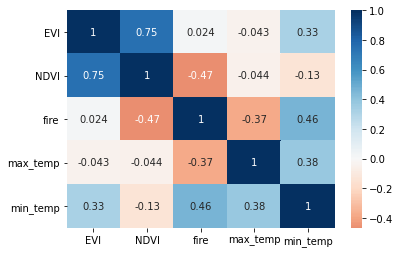

In [24]:
sns.heatmap(bang[['EVI','NDVI','fire','max_temp','min_temp']].corr(),annot=True,cmap='RdBu', center=0)

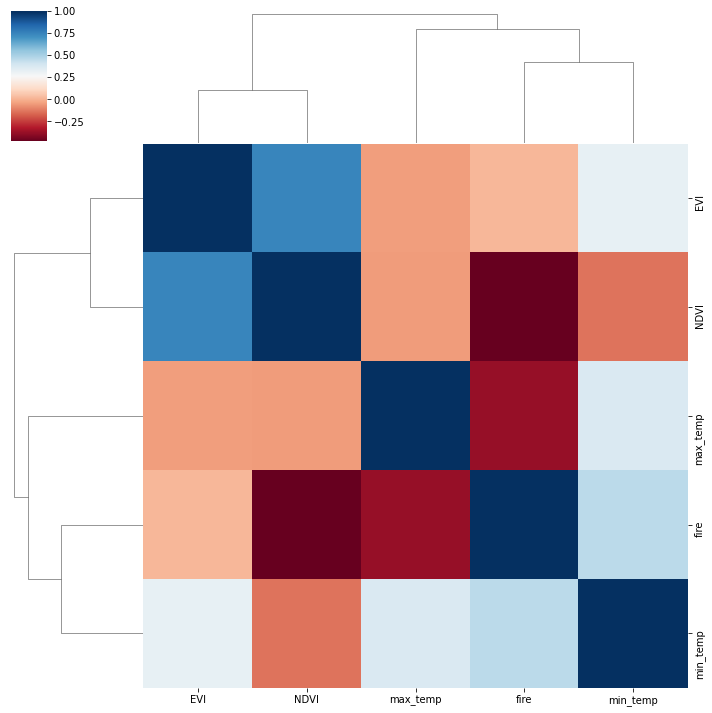

In [25]:
sns.clustermap(bang[['EVI','NDVI','fire','max_temp','min_temp']].corr(),cmap='RdBu')

In [26]:
bang_mean_yearly = bang.groupby('year').mean()
bang_mean_yearly.drop('month',axis=1,inplace=True)
bang_mean_yearly.reset_index(inplace=True)

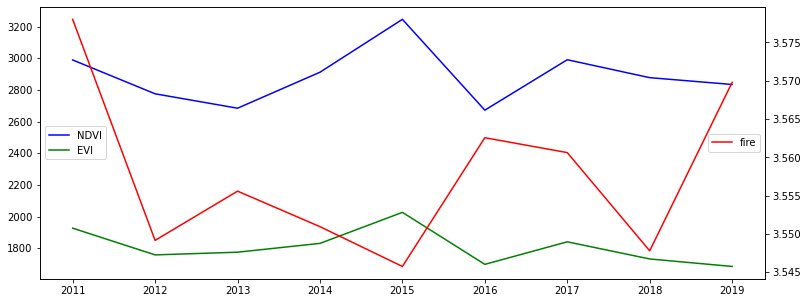

In [27]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(bang_mean_yearly['year'],bang_mean_yearly['NDVI'],label='NDVI',color='blue')
ax1.plot(bang_mean_yearly['year'],bang_mean_yearly['EVI'],label='EVI',color='green')

plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(bang_mean_yearly['year'],bang_mean_yearly['fire'],label='fire',color='red')

plt.legend(loc='center right')

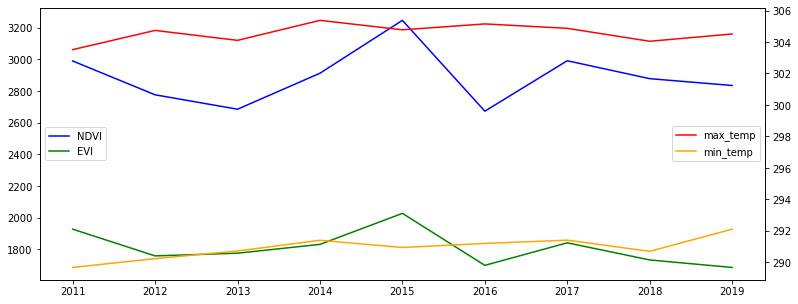

In [28]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(bang_mean_yearly['year'],bang_mean_yearly['NDVI'],label='NDVI',color='blue')
ax1.plot(bang_mean_yearly['year'],bang_mean_yearly['EVI'],label='EVI',color='green')

plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(bang_mean_yearly['year'],bang_mean_yearly['max_temp'],label='max_temp',color='red')
ax2.plot(bang_mean_yearly['year'],bang_mean_yearly['min_temp'],label='min_temp',color='orange')

plt.legend(loc='center right')

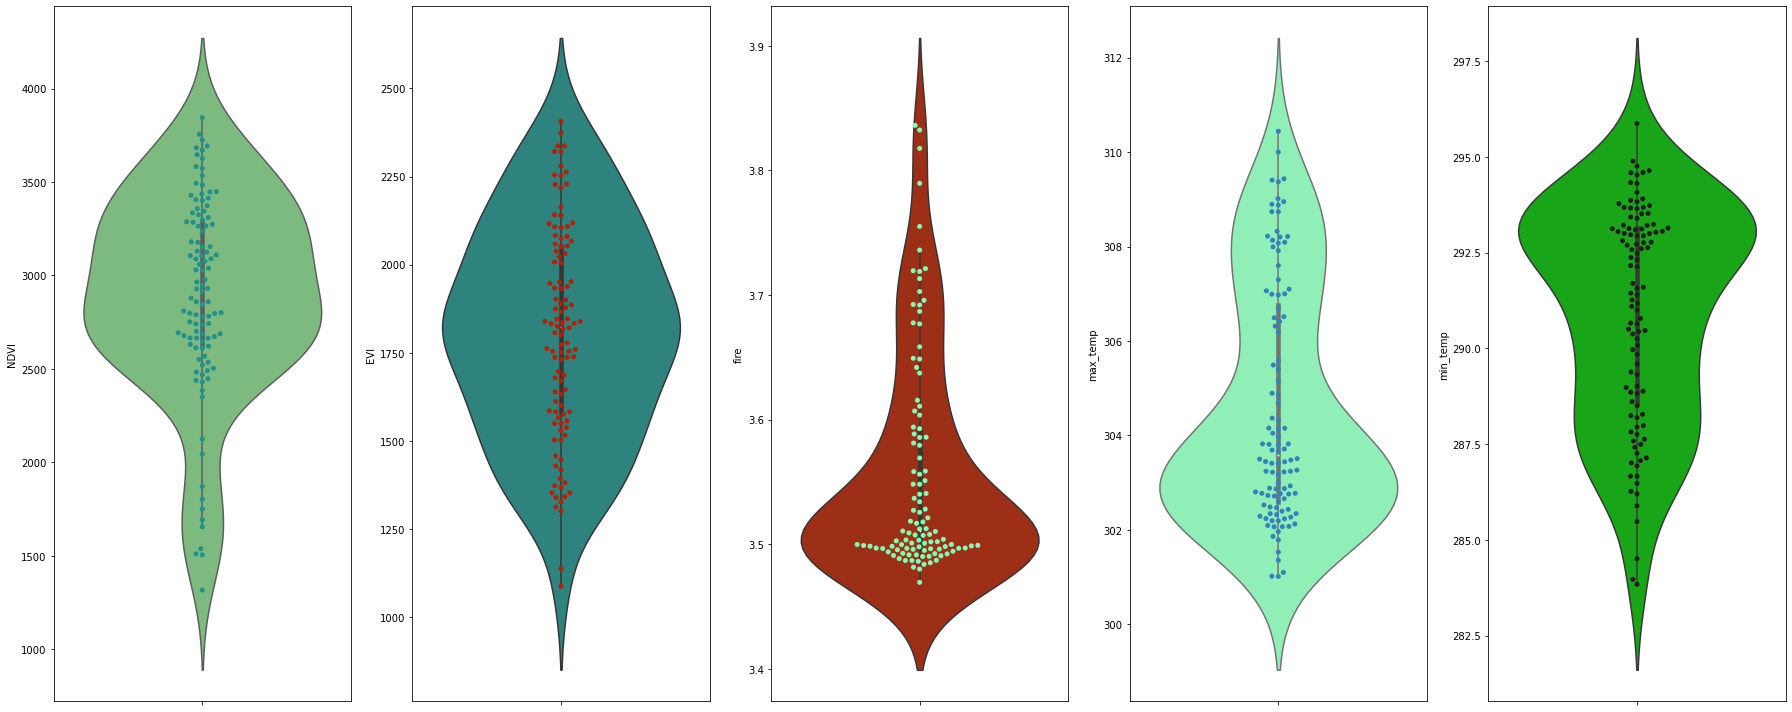

In [29]:
plt.figure(figsize=(25,10))

plt.subplot(151)
sns.violinplot(y='NDVI',data=bang,palette='Greens')
sns.swarmplot(y='NDVI',data=bang,palette='viridis')

plt.subplot(152)
sns.violinplot(y='EVI',data=bang,palette='viridis')
sns.swarmplot(y='EVI',data=bang,palette='gnuplot')

plt.subplot(153)
sns.violinplot(y='fire',data=bang,palette='gnuplot')
sns.swarmplot(y='fire',data=bang,palette='rainbow')

plt.subplot(154)
sns.violinplot(y='max_temp',data=bang,palette='rainbow')
sns.swarmplot(y='max_temp',data=bang,palette='tab20c')

plt.subplot(155)
sns.violinplot(y='min_temp',data=bang,palette='nipy_spectral')
sns.swarmplot(y='min_temp',data=bang,palette='icefire')

plt.tight_layout()

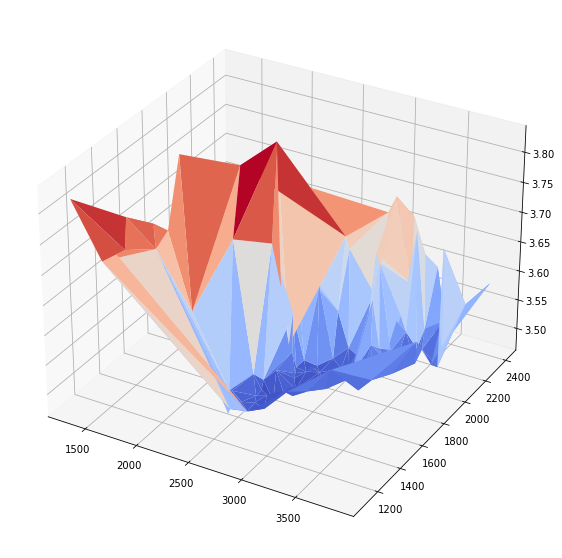

In [30]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_trisurf(bang['NDVI'],bang['EVI'],bang['fire'],cmap='coolwarm', edgecolor='none')

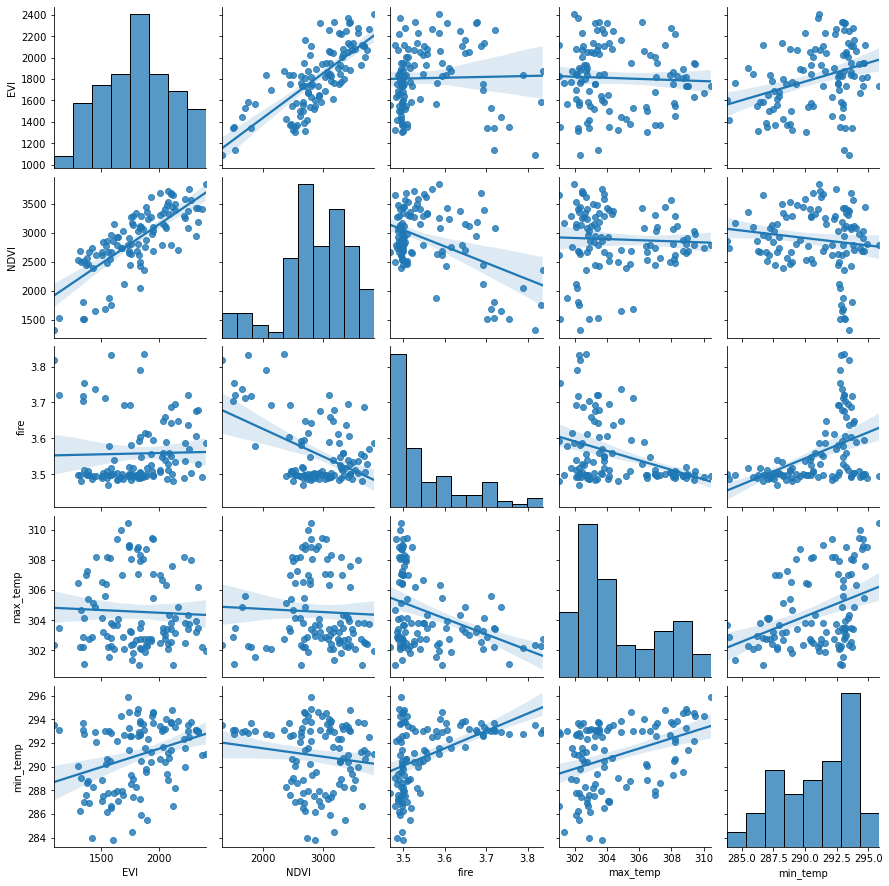

In [31]:
sns.pairplot(bang[['EVI','NDVI','fire','max_temp','min_temp']],kind='reg')

# Inferences for Bangalore

 1. **From Heatmap:**
  + `Fire` value is strongly related to NDVI (*inversely correlated*) and `min_temp`(*positively correlated*) of the location
  + But `EVI` is very weakly related to `Fire`,`min_temp`,`max_temp` values
  + Values of `EVI` and `NDVI` are directly proportional to each other<br><br>  
 2. **From Twinplot with `Fire` and `EVI`,`NDVI`:**
  + With increase in value of `Fire`, decrease in `NDVI` is more significant compared to that of `EVI`
  + With decrease in value of `Fire`, increase in `NDVI` is more significant compared to that of `EVI`<br><br> 
 3. **From Twinplot with `min_temp`,`max_temp` and `EVI`,`NDVI`:**
  + Change in `min_temp` or `max_temp` almost doesnt effect `EVI`,`NDVI`
  

---

# Chennai

<AxesSubplot:>

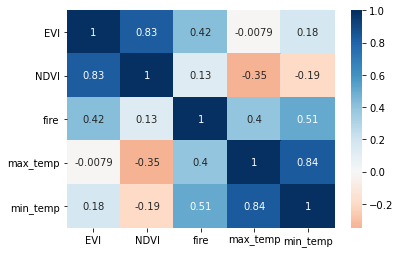

In [32]:
sns.heatmap(chennai[['EVI','NDVI','fire','max_temp','min_temp']].corr(),annot=True,cmap='RdBu', center=0)

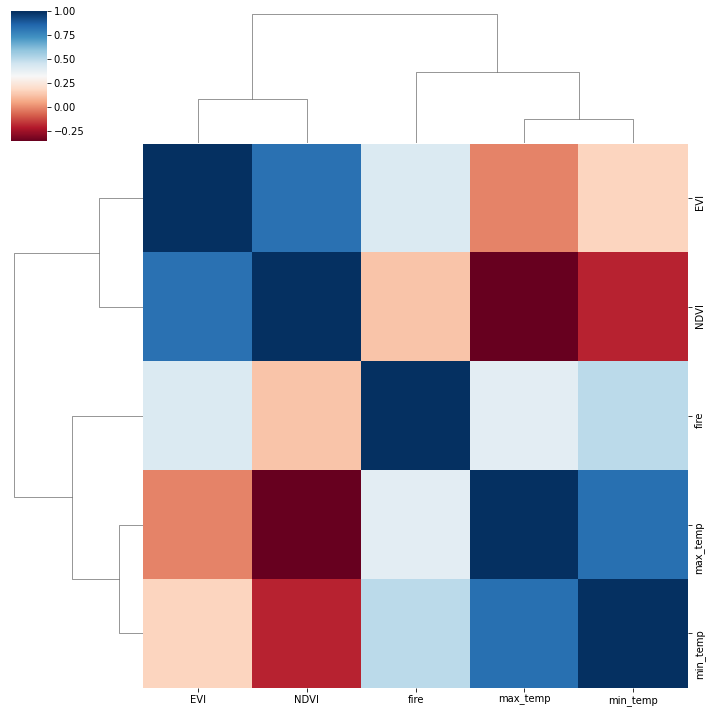

In [33]:
sns.clustermap(chennai[['EVI','NDVI','fire','max_temp','min_temp']].corr(),cmap='RdBu')

In [34]:
chennai_mean_yearly = chennai.groupby('year').mean()
chennai_mean_yearly.drop('month',axis=1,inplace=True)
chennai_mean_yearly.reset_index(inplace=True)

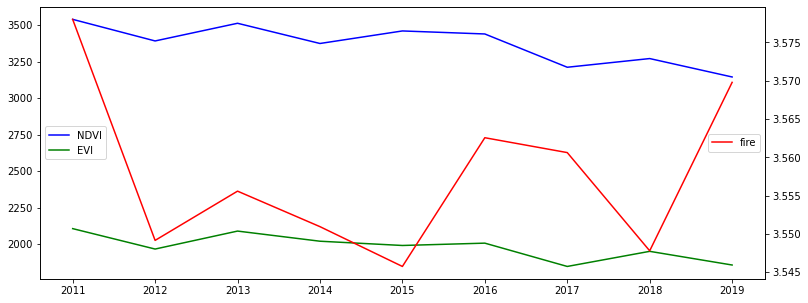

In [35]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(chennai_mean_yearly['year'],chennai_mean_yearly['NDVI'],label='NDVI',color='blue')
ax1.plot(chennai_mean_yearly['year'],chennai_mean_yearly['EVI'],label='EVI',color='green')

plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(chennai_mean_yearly['year'],chennai_mean_yearly['fire'],label='fire',color='red')

plt.legend(loc='center right')

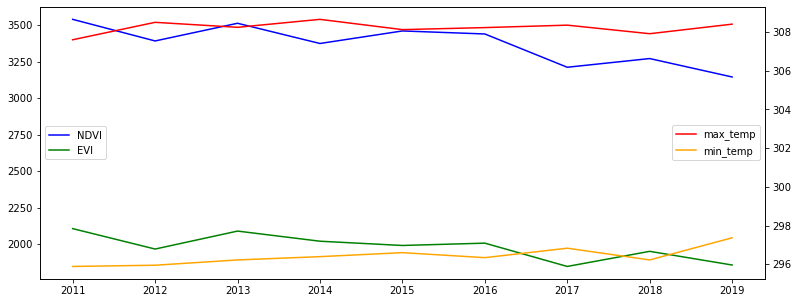

In [36]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(chennai_mean_yearly['year'],chennai_mean_yearly['NDVI'],label='NDVI',color='blue')
ax1.plot(chennai_mean_yearly['year'],chennai_mean_yearly['EVI'],label='EVI',color='green')

plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(chennai_mean_yearly['year'],chennai_mean_yearly['max_temp'],label='max_temp',color='red')
ax2.plot(chennai_mean_yearly['year'],chennai_mean_yearly['min_temp'],label='min_temp',color='orange')

plt.legend(loc='center right')

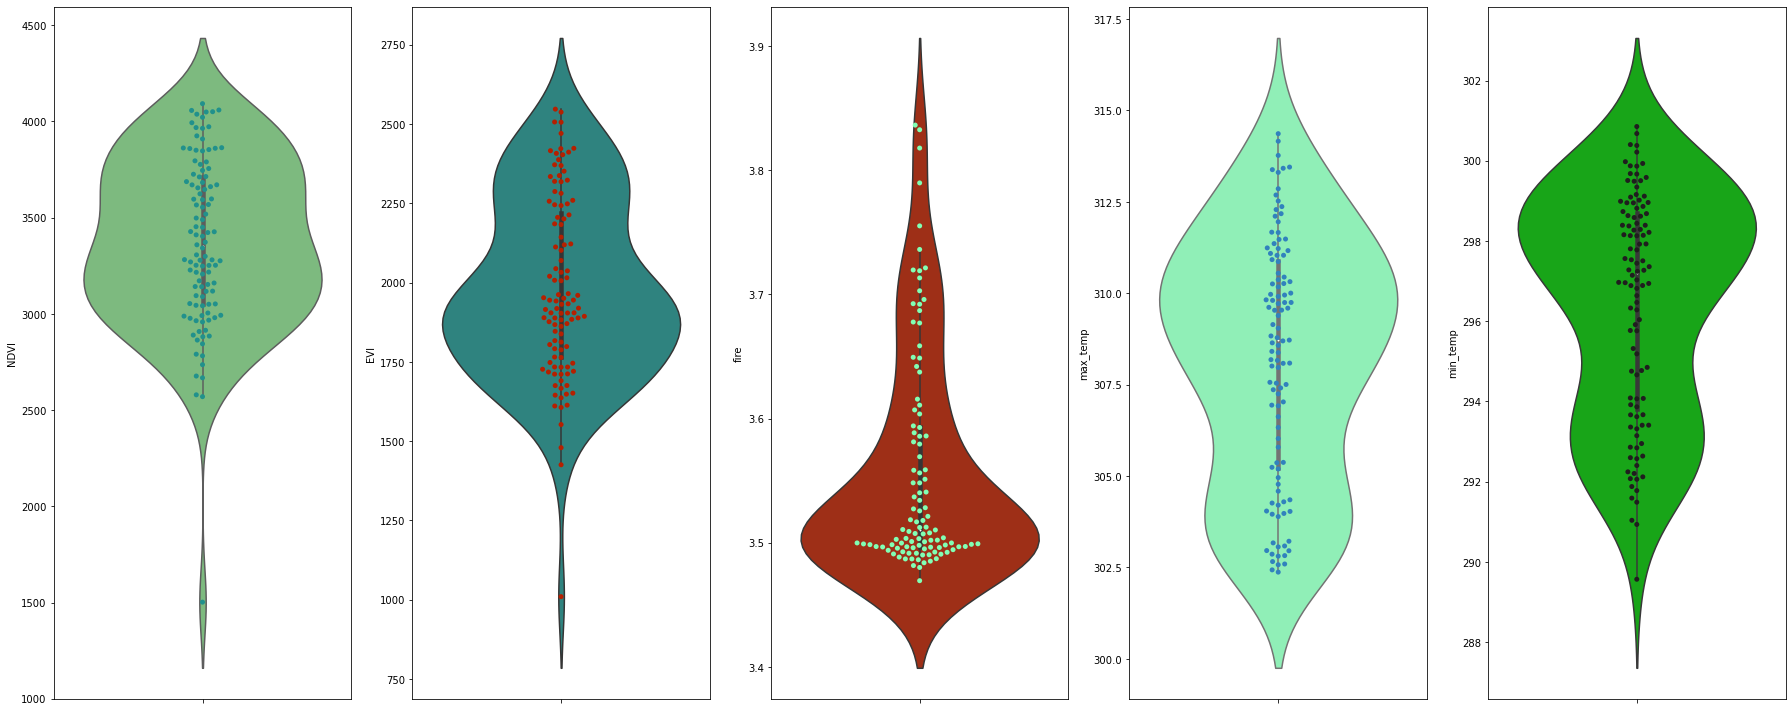

In [37]:
plt.figure(figsize=(25,10))

plt.subplot(151)
sns.violinplot(y='NDVI',data=chennai,palette='Greens')
sns.swarmplot(y='NDVI',data=chennai,palette='viridis')

plt.subplot(152)
sns.violinplot(y='EVI',data=chennai,palette='viridis')
sns.swarmplot(y='EVI',data=chennai,palette='gnuplot')

plt.subplot(153)
sns.violinplot(y='fire',data=chennai,palette='gnuplot')
sns.swarmplot(y='fire',data=chennai,palette='rainbow')

plt.subplot(154)
sns.violinplot(y='max_temp',data=chennai,palette='rainbow')
sns.swarmplot(y='max_temp',data=chennai,palette='tab20c')

plt.subplot(155)
sns.violinplot(y='min_temp',data=chennai,palette='nipy_spectral')
sns.swarmplot(y='min_temp',data=chennai,palette='icefire')

plt.tight_layout()

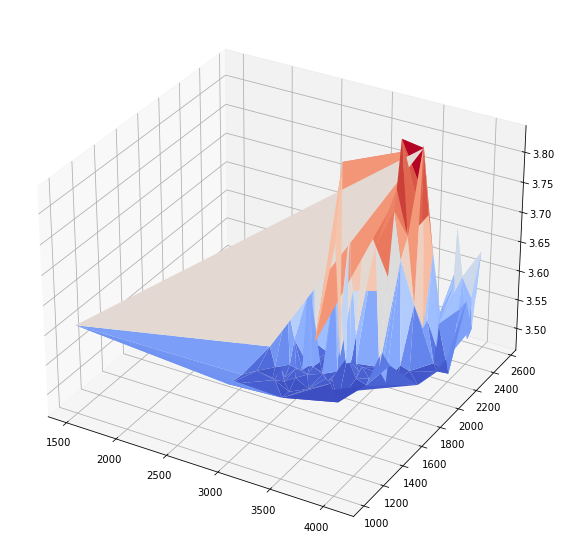

In [38]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_trisurf(chennai['NDVI'],chennai['EVI'],chennai['fire'],cmap='coolwarm', edgecolor='none')

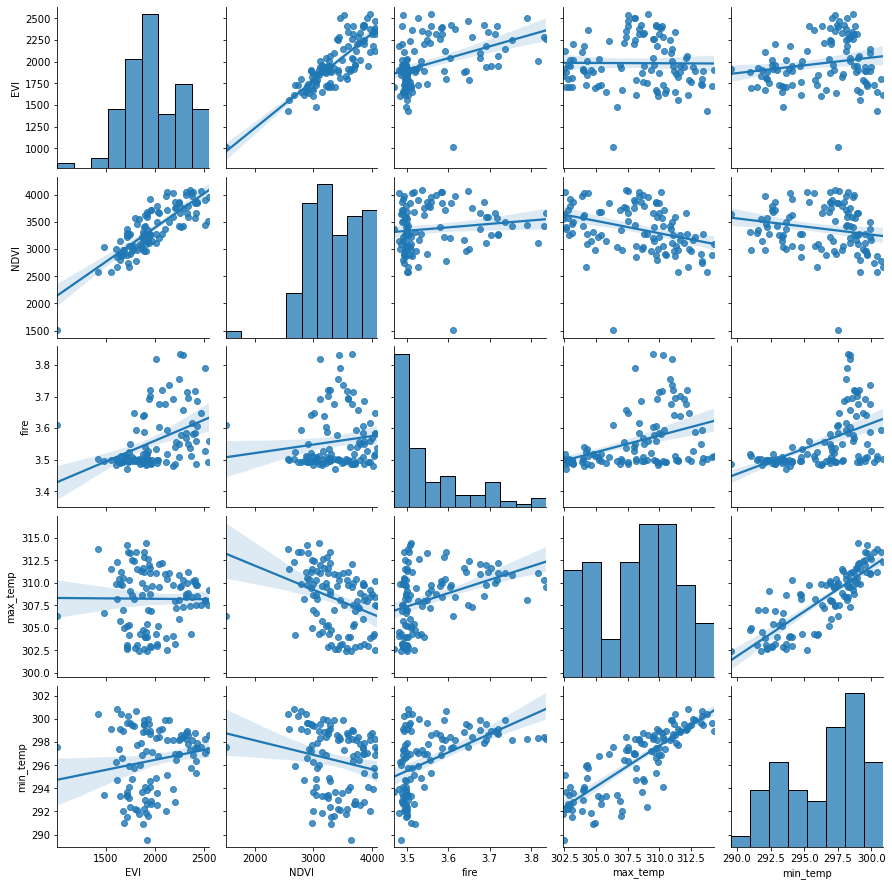

In [39]:
sns.pairplot(chennai[['EVI','NDVI','fire','max_temp','min_temp']],kind='reg')

# Inferences for Chennai

 1. **From Heatmap:**
  + `Fire` value is strongly related to `EVI`(*postively correlated*) and `min_temp`(*positively correlated*) of the location
  + But `NDVI` is very weakly related to `Fire`,`min_temp`,`max_temp` values
  + Values of `EVI` and `NDVI` are directly proportional to each other<br><br>  
 2. **From Twinplot with `Fire` and `EVI`,`NDVI`:**
  + Change in value of `Fire`, effects `EVI` but almost doesnt effect `NDVI`<br><br>
 3. **From Twinplot with `min_temp`,`max_temp` and `EVI`,`NDVI`:**
  + Change in `min_temp` or `max_temp` almost doesnt effect `EVI`,`NDVI`<br><br>
 4. **From Graphs in Pairplot:**
  + `EVI`increases with value of `Fire`
  + `max_temp` and `min_temp` almost doesnt effect the value of `EVI` compared to that of `NDVI`(*inversely correlated*)
  

---

# Delhi

<AxesSubplot:>

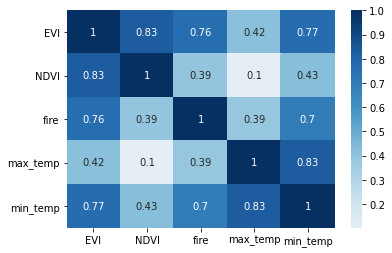

In [40]:
sns.heatmap(delhi[['EVI','NDVI','fire','max_temp','min_temp']].corr(),annot=True,cmap='RdBu', center=0)

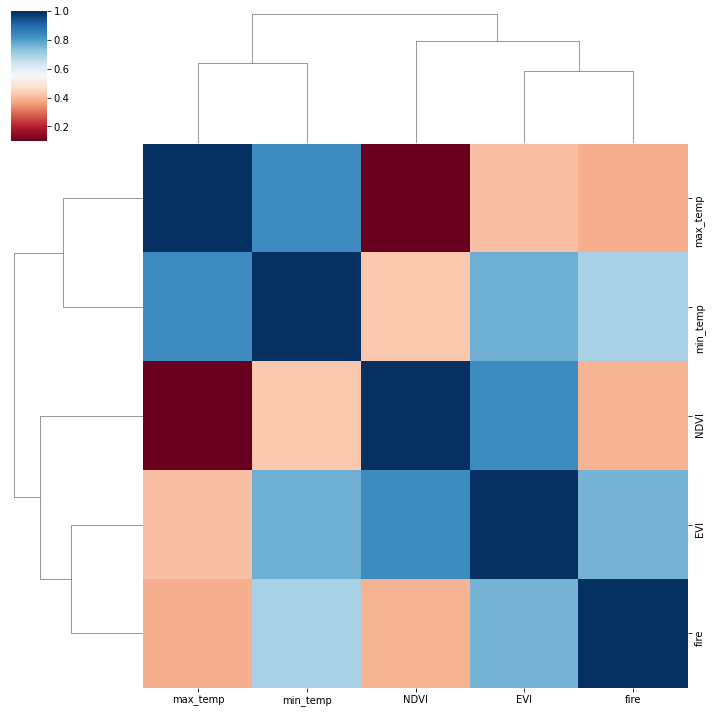

In [41]:
sns.clustermap(delhi[['EVI','NDVI','fire','max_temp','min_temp']].corr(),cmap='RdBu')

In [42]:
delhi_mean_yearly = delhi.groupby('year').mean()
delhi_mean_yearly.drop('month',axis=1,inplace=True)
delhi_mean_yearly.reset_index(inplace=True)

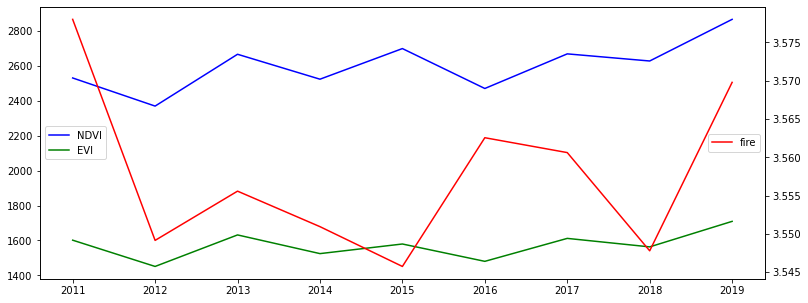

In [43]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(delhi_mean_yearly['year'],delhi_mean_yearly['NDVI'],label='NDVI',color='blue')
ax1.plot(delhi_mean_yearly['year'],delhi_mean_yearly['EVI'],label='EVI',color='green')

plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(delhi_mean_yearly['year'],delhi_mean_yearly['fire'],label='fire',color='red')

plt.legend(loc='center right')

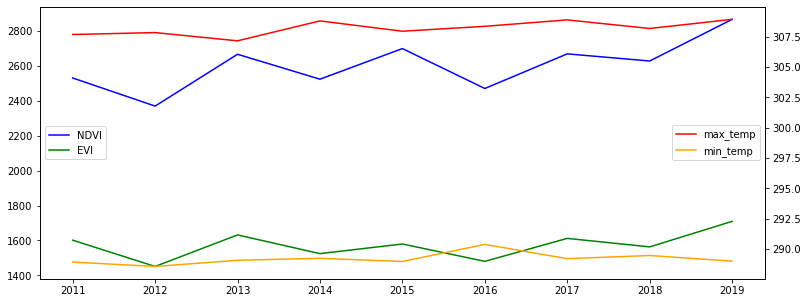

In [44]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(delhi_mean_yearly['year'],delhi_mean_yearly['NDVI'],label='NDVI',color='blue')
ax1.plot(delhi_mean_yearly['year'],delhi_mean_yearly['EVI'],label='EVI',color='green')

plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(delhi_mean_yearly['year'],delhi_mean_yearly['max_temp'],label='max_temp',color='red')
ax2.plot(delhi_mean_yearly['year'],delhi_mean_yearly['min_temp'],label='min_temp',color='orange')

plt.legend(loc='center right')

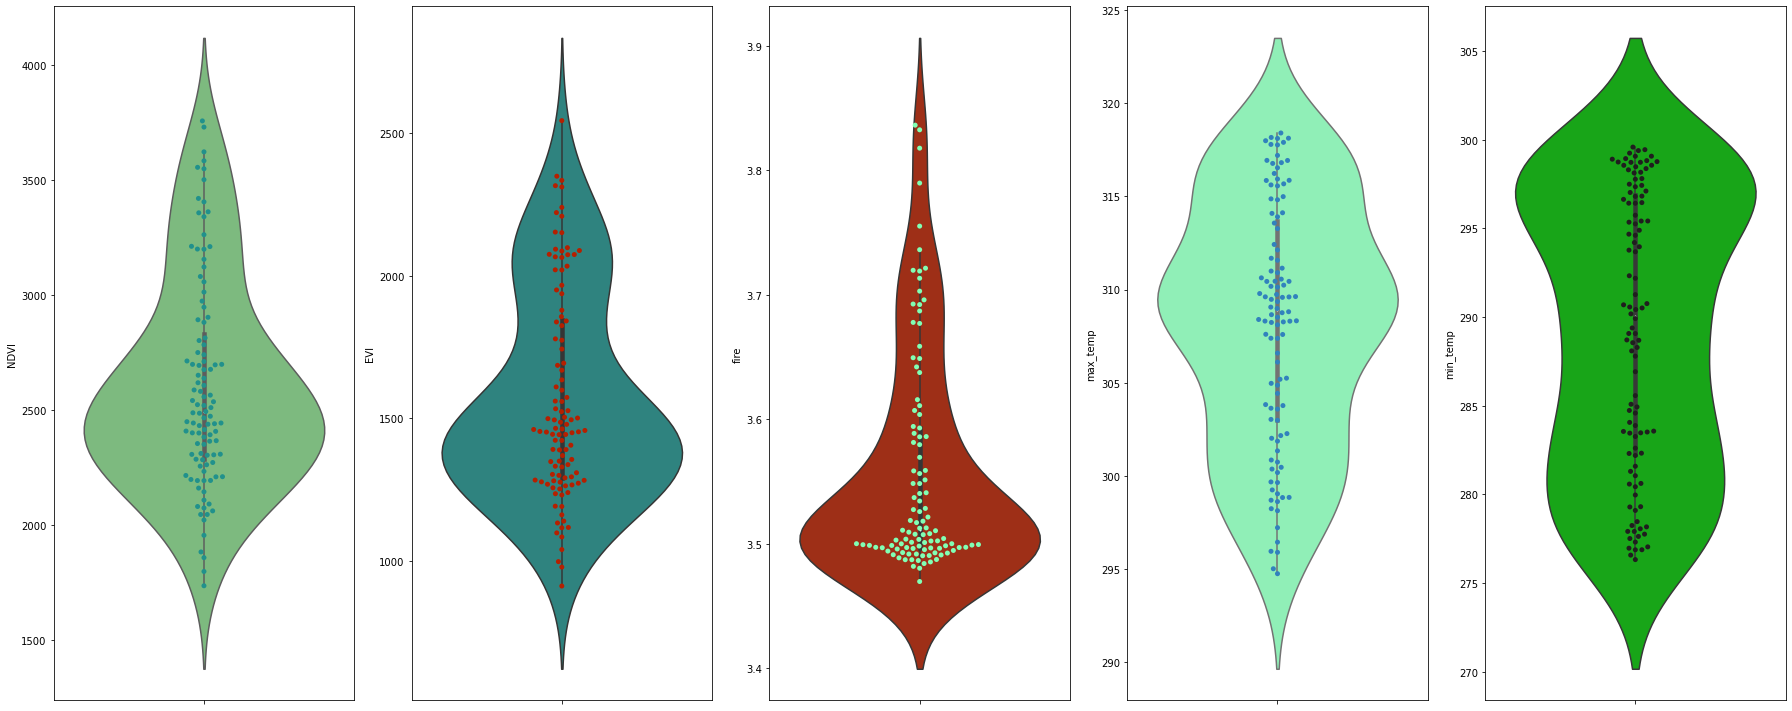

In [45]:
plt.figure(figsize=(25,10))

plt.subplot(151)
sns.violinplot(y='NDVI',data=delhi,palette='Greens')
sns.swarmplot(y='NDVI',data=delhi,palette='viridis')

plt.subplot(152)
sns.violinplot(y='EVI',data=delhi,palette='viridis')
sns.swarmplot(y='EVI',data=delhi,palette='gnuplot')

plt.subplot(153)
sns.violinplot(y='fire',data=delhi,palette='gnuplot')
sns.swarmplot(y='fire',data=delhi,palette='rainbow')

plt.subplot(154)
sns.violinplot(y='max_temp',data=delhi,palette='rainbow')
sns.swarmplot(y='max_temp',data=delhi,palette='tab20c')

plt.subplot(155)
sns.violinplot(y='min_temp',data=delhi,palette='nipy_spectral')
sns.swarmplot(y='min_temp',data=delhi,palette='icefire')

plt.tight_layout()

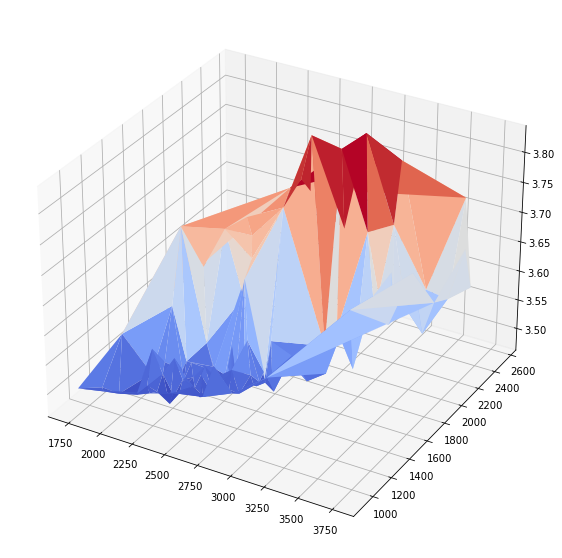

In [46]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_trisurf(delhi['NDVI'],delhi['EVI'],delhi['fire'],cmap='coolwarm', edgecolor='none')

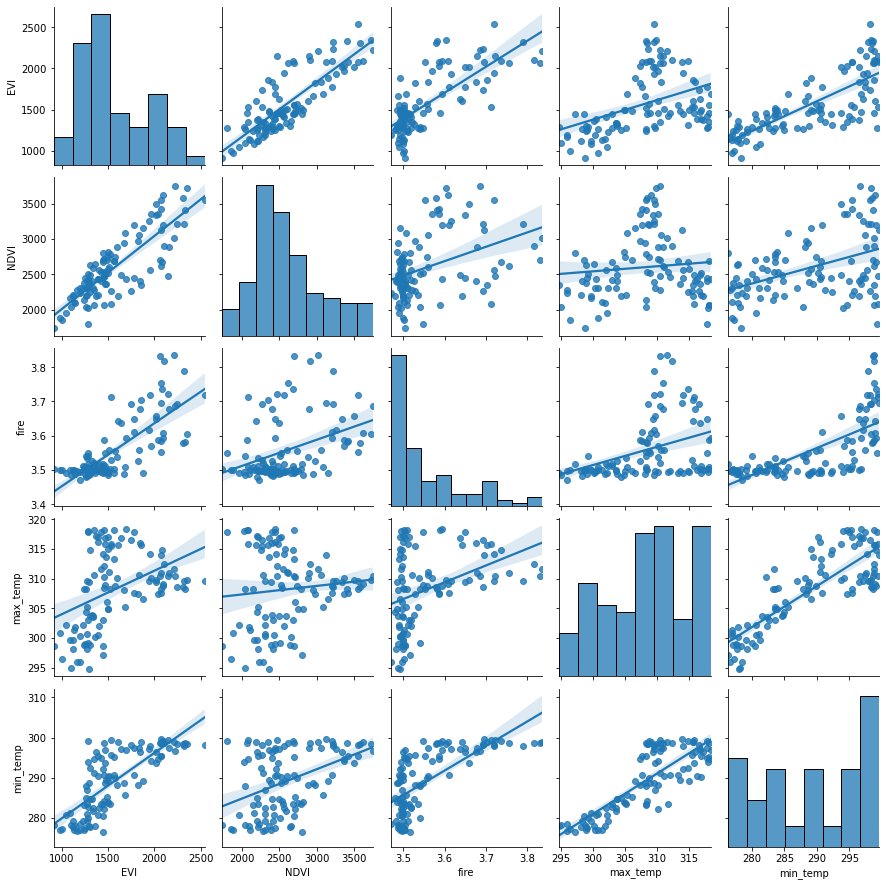

In [47]:
sns.pairplot(delhi[['EVI','NDVI','fire','max_temp','min_temp']],kind='reg')

# Inferences for Delhi

 1. **From Heatmap:**
  + `Fire` value is strongly related to `EVI`(*postively correlated*) and `min_temp`(*positively correlated*) of the location
  + But `NDVI` is very weakly related to `Fire`,`min_temp`,`max_temp` values
  + `min_temp` has a strong positive correlation to `EVI`
  + Values of `EVI` and `NDVI` are directly proportional to each other<br><br>  
 2. **From Twinplot with `Fire` and `EVI`,`NDVI`:**
  + Increase in value of `Fire`, shows significant increase in `EVI`
  + Decrease in value of `Fire`, shows significant decrease in `EVI`<br><br>
 3. **From Twinplot with `min_temp`,`max_temp` and `EVI`,`NDVI`:**
  + Change in `min_temp` effects `EVI`,`NDVI`(positively correlated)<br><br>
 4. **From Graphs in Pairplot:**
  + `EVI`and `NDVI` increases with increase in value of `Fire` but the former is significant
  + `max_temp` almost doesnt effect the value of `EVI` and `NDVI`
  + `Fire` value is directly proportional to `min_temp`
  

---

# Mumbai

<AxesSubplot:>

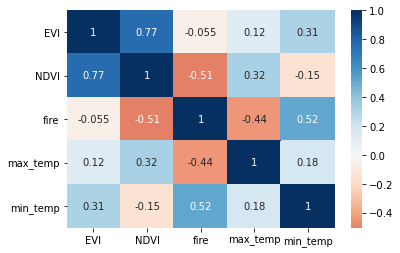

In [48]:
sns.heatmap(mumbai[['EVI','NDVI','fire','max_temp','min_temp']].corr(),annot=True,cmap='RdBu', center=0)

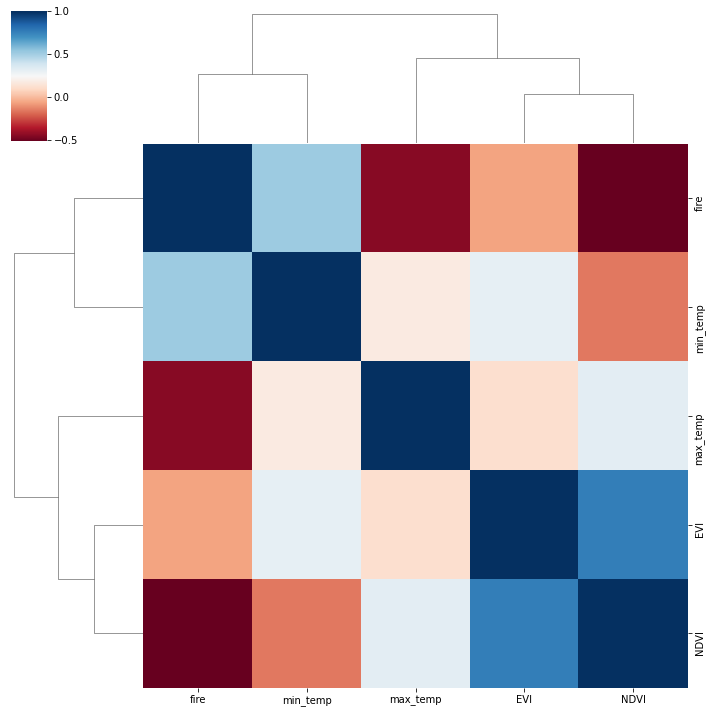

In [49]:
sns.clustermap(mumbai[['EVI','NDVI','fire','max_temp','min_temp']].corr(),cmap='RdBu')

In [50]:
mumbai_mean_yearly = mumbai.groupby('year').mean()
mumbai_mean_yearly.drop('month',axis=1,inplace=True)
mumbai_mean_yearly.reset_index(inplace=True)

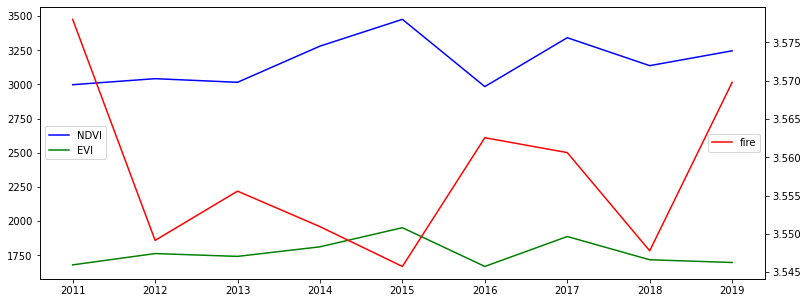

In [51]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['NDVI'],label='NDVI',color='blue')
ax1.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['EVI'],label='EVI',color='green')

plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['fire'],label='fire',color='red')

plt.legend(loc='center right')

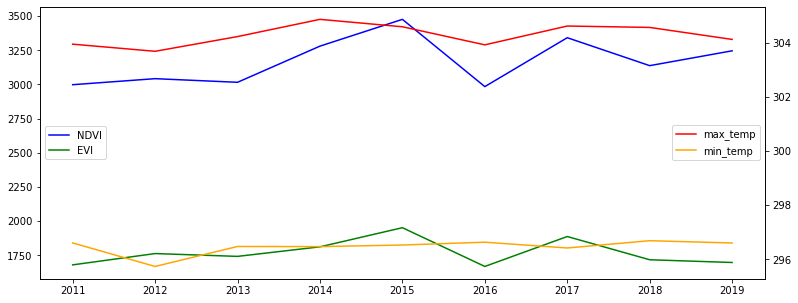

In [52]:
fig, ax1 = plt.subplots(figsize=(13,5))

ax1.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['NDVI'],label='NDVI',color='blue')
ax1.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['EVI'],label='EVI',color='green')

plt.legend(loc='center left')

ax2 = ax1.twinx()

ax2.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['max_temp'],label='max_temp',color='red')
ax2.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['min_temp'],label='min_temp',color='orange')

plt.legend(loc='center right')

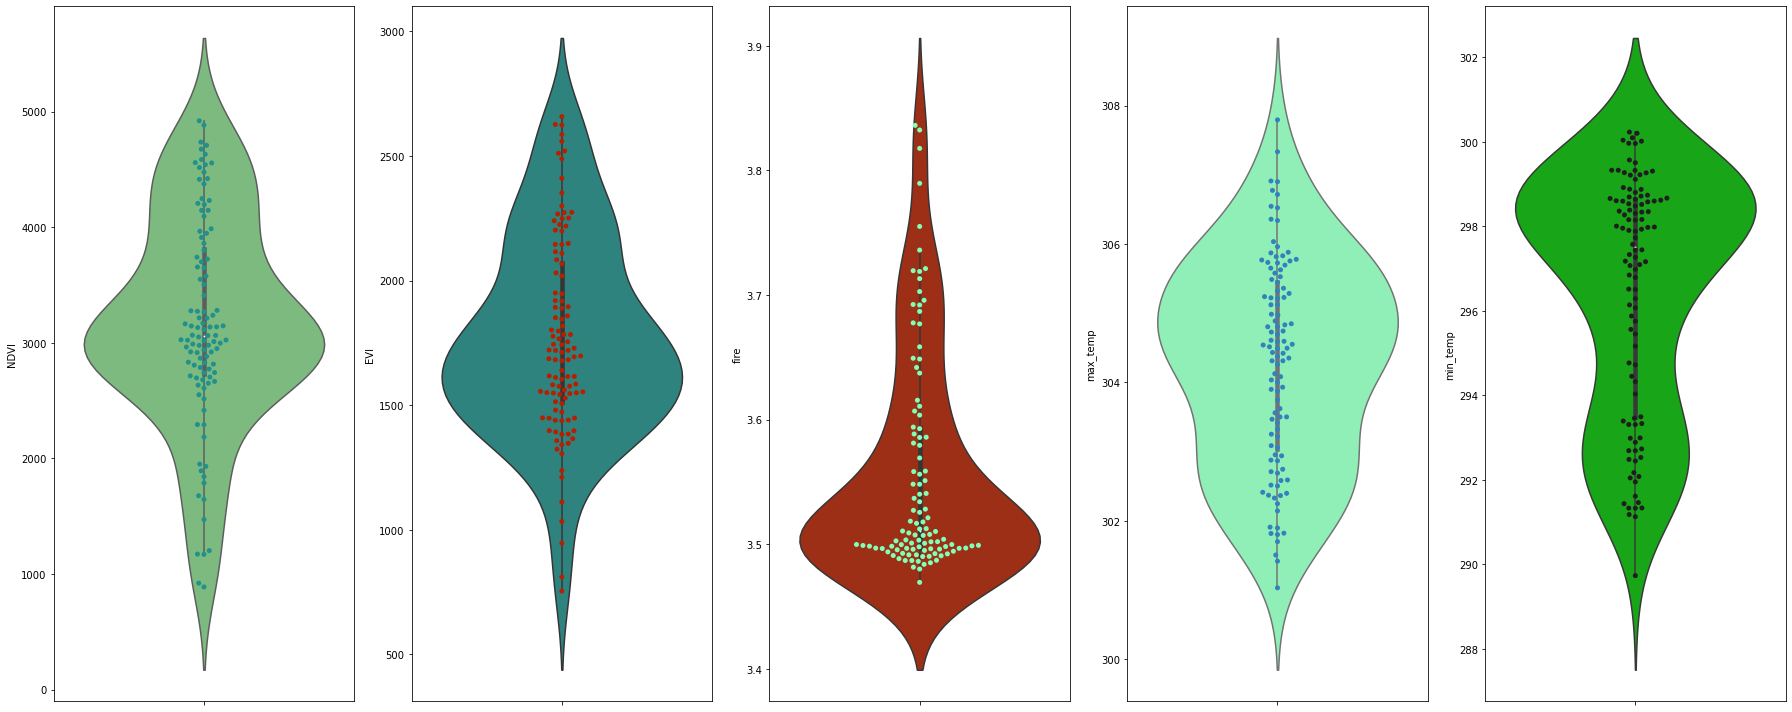

In [53]:
plt.figure(figsize=(25,10))

plt.subplot(151)
sns.violinplot(y='NDVI',data=mumbai,palette='Greens')
sns.swarmplot(y='NDVI',data=mumbai,palette='viridis')

plt.subplot(152)
sns.violinplot(y='EVI',data=mumbai,palette='viridis')
sns.swarmplot(y='EVI',data=mumbai,palette='gnuplot')

plt.subplot(153)
sns.violinplot(y='fire',data=mumbai,palette='gnuplot')
sns.swarmplot(y='fire',data=mumbai,palette='rainbow')

plt.subplot(154)
sns.violinplot(y='max_temp',data=mumbai,palette='rainbow')
sns.swarmplot(y='max_temp',data=mumbai,palette='tab20c')

plt.subplot(155)
sns.violinplot(y='min_temp',data=mumbai,palette='nipy_spectral')
sns.swarmplot(y='min_temp',data=mumbai,palette='icefire')

plt.tight_layout()

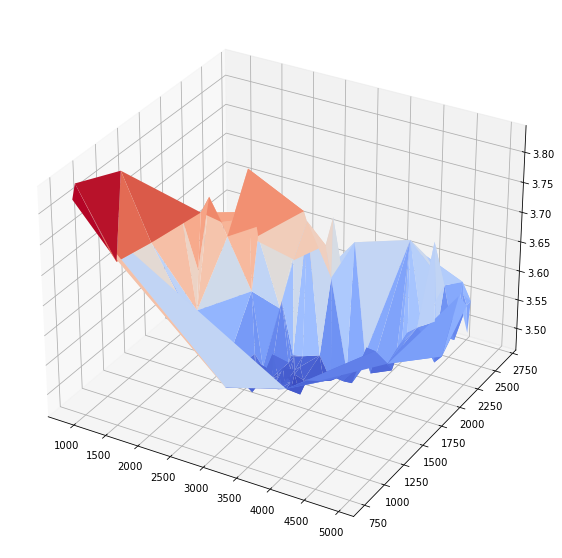

In [54]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_trisurf(mumbai['NDVI'],mumbai['EVI'],mumbai['fire'],cmap='coolwarm', edgecolor='none')

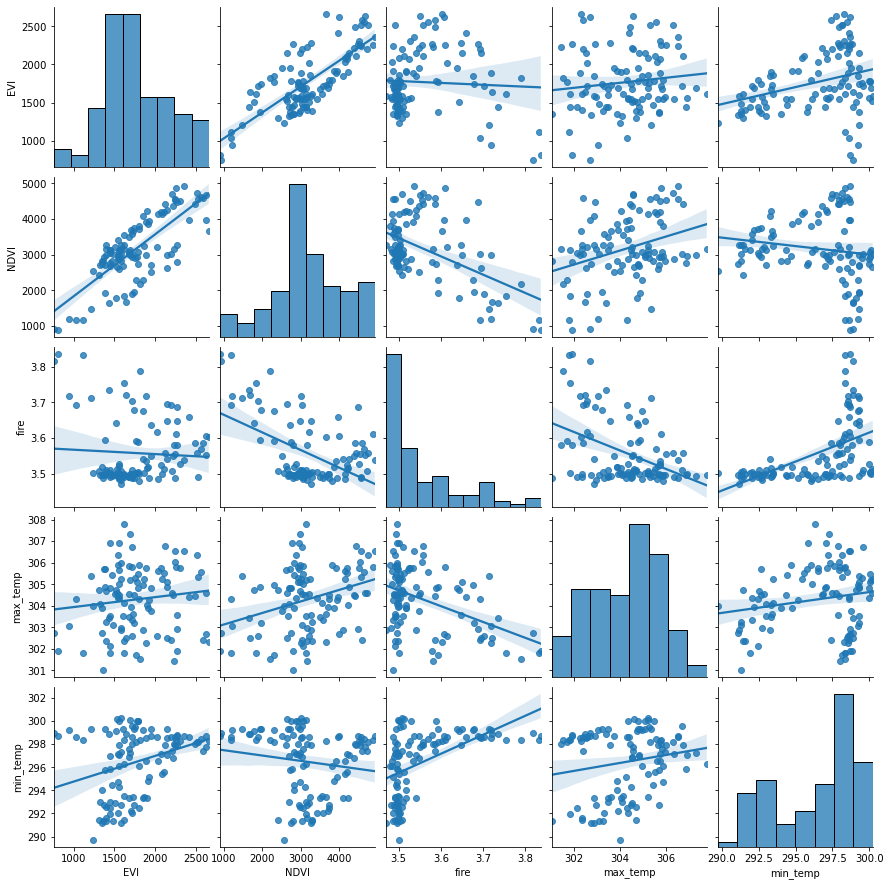

In [55]:
sns.pairplot(mumbai[['EVI','NDVI','fire','max_temp','min_temp']],kind='reg')

# Inferences for Mumbai

 1. **From Heatmap:**
  + `Fire` value almost doesnt effect `EVI`
  + `NDVI` is strongly weakly related to `Fire`values
  + Values of `EVI` and `NDVI` are directly proportional to each other<br><br>  
 2. **From Twinplot with `Fire` and `EVI`,`NDVI`:**
  + Increase in value of `Fire`, shows significant decrease in `NDVI` but almost no effect on `EVI`
  + Decrease in value of `Fire`, shows significant increase in `NDVI` but almost no effect on `EVI`<br><br>
 3. **From Twinplot with `min_temp`,`max_temp` and `EVI`,`NDVI`:**
  + Change in `max_temp` almost doesnt effect`EVI`<br><br>
 4. **From Graphs in Pairplot:**
  + `NDVI` significantly decreases with increase in value of `Fire` but `EVI` almost has slope 0 with `Fire`
  + `max_temp` almost doesnt effect the value of `EVI` and `NDVI`
  + `EVI` shows a considerable amount of increase with increase in `min_temp`
  + `NDVI` is significant positive correlation with `max_temp`
  + `Fire` value is directly proportional to `min_temp`
  

---